In [1]:
#global imports
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_svmlight_file
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import torch

In [2]:
#local imports
from gsom import GSOM 
from npsomfinal import NPSOM  , rank_features_by_variance , rank_features_by_activation , rank_features_by_activation2 , rank_features_by_importance , rank_features_by_hybridapproach
from pca import get_reduced_data
from classifier import get_test_accuracy
from noneuronpsom import neuroablatedNPSOM
from noforgetnpsom import forgetablatedNPSOM
from nodecaynpsom import decayablatedNPSOM

In [3]:
def get_data_npsom(data , X_test , num_features):
    grid_size = (5 , 5)  # 10x10 grid
    input_dim = data.shape[1]
    npsom = NPSOM(grid_size, input_dim,sigma=1,  learning_rate=0.1, decay_rate=1e-5)
    npsom.train(data , num=1 ,  batch_size=10  , iterations_per_batch=5)
    feature_rankings , feature_contributions = rank_features_by_importance(npsom)
    top_features = feature_rankings[:num_features]
    reduced_data1 = data[:, top_features]
    reduced_test1 = X_test[:, top_features]
    return reduced_data1 , reduced_test1    

In [4]:
def get_noneuro_data_npsom(data , X_test , num_features):
    grid_size = (5 , 5)  # 10x10 grid
    input_dim = data.shape[1]
    npsom = neuroablatedNPSOM(grid_size, input_dim,sigma=1,  learning_rate=0.1, decay_rate=1e-5)
    npsom.train(data , num=1 ,  batch_size=10  , iterations_per_batch=5)
    feature_rankings , feature_contributions = rank_features_by_importance(npsom)
    top_features = feature_rankings[:num_features]
    reduced_data1 = data[:, top_features]
    reduced_test1 = X_test[:, top_features]
    return reduced_data1 , reduced_test1    

In [5]:
def get_noforget_data_npsom(data , X_test , num_features):
    grid_size = (5 , 5)  # 10x10 grid
    input_dim = data.shape[1]
    npsom = forgetablatedNPSOM(grid_size, input_dim,sigma=1,  learning_rate=0.1, decay_rate=1e-5)
    npsom.train(data , num=1 ,  batch_size=10  , iterations_per_batch=5)
    feature_rankings , feature_contributions = rank_features_by_importance(npsom)
    top_features = feature_rankings[:num_features]
    reduced_data1 = data[:, top_features]
    reduced_test1 = X_test[:, top_features]
    return reduced_data1 , reduced_test1    

In [6]:
def get_nodecay_data_npsom(data , X_test , num_features):
    grid_size = (5 , 5)  # 10x10 grid
    input_dim = data.shape[1]
    npsom = decayablatedNPSOM(grid_size, input_dim,sigma=1,  learning_rate=0.1, decay_rate=1e-5)
    npsom.train(data , num=1 ,  batch_size=10  , iterations_per_batch=5)
    feature_rankings , feature_contributions = rank_features_by_importance(npsom)
    top_features = feature_rankings[:num_features]
    reduced_data1 = data[:, top_features]
    reduced_test1 = X_test[:, top_features]
    return reduced_data1 , reduced_test1    

Training Data Shape: (612, 2503)
Test Data Shape: (263, 2503)
Processing Batch 1/62
0 neuron deleted at []
neuron added
Processing Batch 2/62
neuron added
Processing Batch 3/62
neuron added
Processing Batch 4/62
neuron added
Processing Batch 5/62
neuron added
Processing Batch 6/62
neuron added
Processing Batch 7/62
neuron added
Processing Batch 8/62
neuron added
Processing Batch 9/62
neuron added
Processing Batch 10/62
neuron added
Processing Batch 11/62
1 neuron deleted at [27]
neuron added
Processing Batch 12/62
neuron added
Processing Batch 13/62
neuron added
Processing Batch 14/62
neuron added
Processing Batch 15/62
neuron added
Processing Batch 16/62
neuron added
Processing Batch 17/62
neuron added
Processing Batch 18/62
neuron added
Processing Batch 19/62
neuron added
Processing Batch 20/62
neuron added
Processing Batch 21/62
1 neuron deleted at [37]
neuron added
Processing Batch 22/62
neuron added
Processing Batch 23/62
neuron added
Processing Batch 24/62
neuron added
Processing

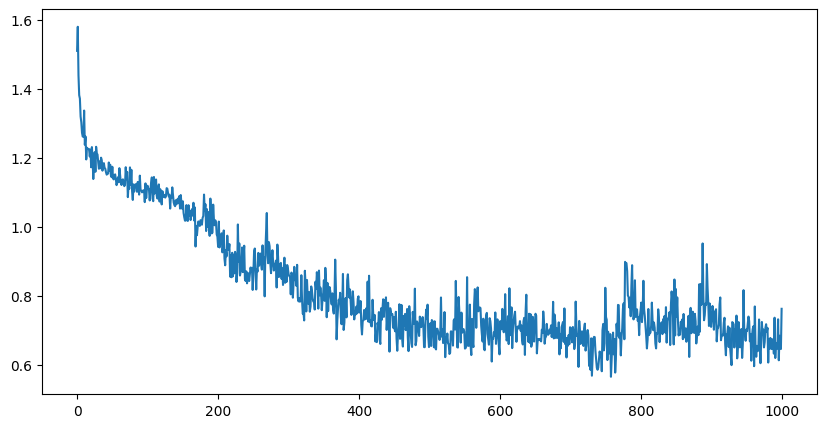

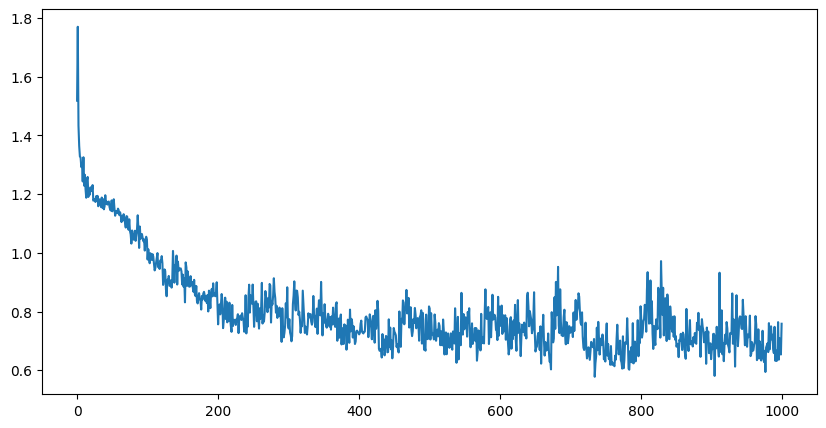

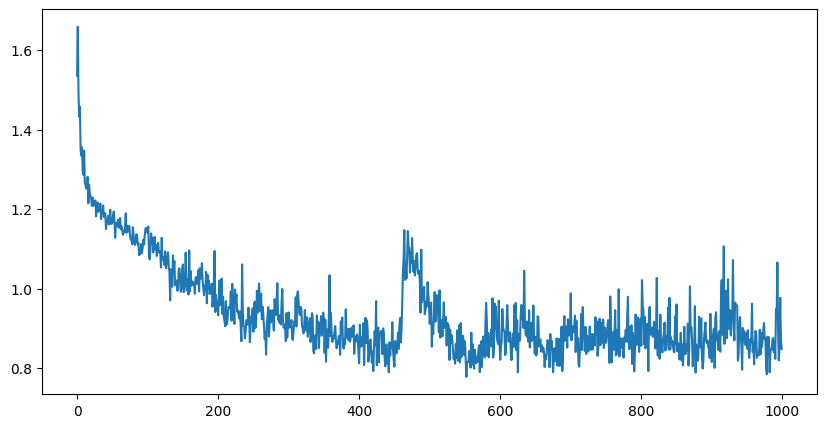

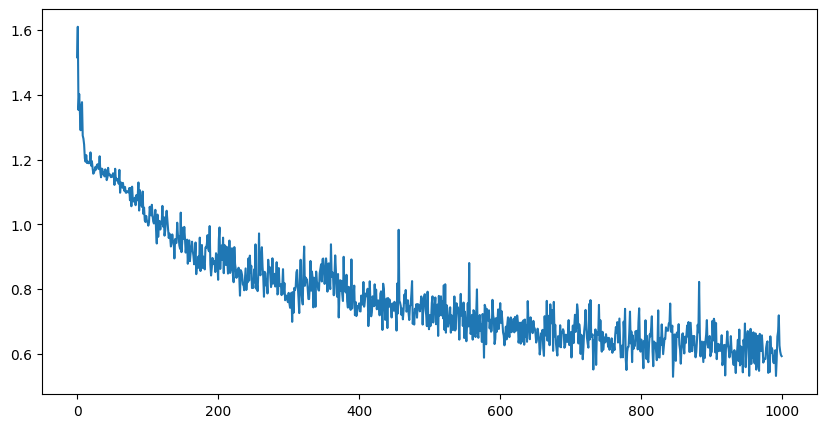

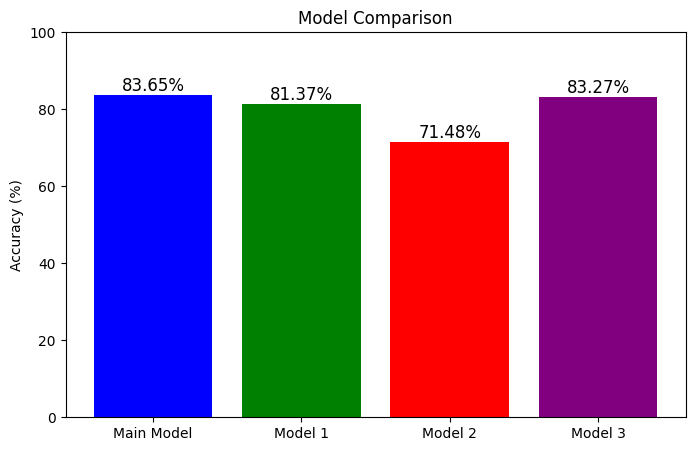

In [13]:
DATAset_name = 'BRCA'
# Load training data
data1 = np.loadtxt(f"{DATAset_name}/1_tr.csv", delimiter=",", dtype=np.float64)
data2 = np.loadtxt(f"{DATAset_name}/2_tr.csv", delimiter=",", dtype=np.float64)
data3 = np.loadtxt(f"{DATAset_name}/3_tr.csv", delimiter=",", dtype=np.float64)
data = np.hstack((data1 , data2 , data3))
labels = np.loadtxt(f"{DATAset_name}/labels_tr.csv", delimiter=",", dtype=np.int32)

# Load testing data
X_test1 = np.loadtxt(f"{DATAset_name}/1_te.csv", delimiter=",", dtype=np.float64)
X_test2 = np.loadtxt(f"{DATAset_name}/2_te.csv", delimiter=",", dtype=np.float64)
X_test3 = np.loadtxt(f"{DATAset_name}/3_te.csv", delimiter=",", dtype=np.float64)
X_test = np.hstack((X_test1 , X_test2 , X_test3))
y_test = np.loadtxt(f"{DATAset_name}/labels_te.csv", delimiter=",", dtype=np.int32)

print("Training Data Shape:", data.shape)  
print("Test Data Shape:", X_test.shape) 

lr = 0.05
num_classes = 5
epoch = 1000
num_feature = 300
reduced_data, reduced_test = get_data_npsom(data , X_test , num_feature)
reduced_data1 , reduced_test1 = get_noneuro_data_npsom(data , X_test , num_feature)
reduced_data2 , reduced_test2 = get_noforget_data_npsom(data , X_test , num_feature)
reduced_data3 , reduced_test3 = get_nodecay_data_npsom(data , X_test , num_feature)
accuracy = get_test_accuracy(reduced_data , reduced_test , labels , y_test ,num_classes = num_classes , lr = lr, num_epoch=epoch , l2_lambda=0.00)*100
time.sleep(10)
accuracy1 = get_test_accuracy(reduced_data1 , reduced_test1 , labels , y_test ,num_classes = num_classes , lr = lr, num_epoch=epoch , l2_lambda=0.00)*100
time.sleep(10)
accuracy2 = get_test_accuracy(reduced_data2 , reduced_test2 , labels , y_test ,num_classes = num_classes , lr = lr, num_epoch=epoch , l2_lambda=0.00)*100
time.sleep(10)
accuracy3 = get_test_accuracy(reduced_data3 , reduced_test3 , labels , y_test ,num_classes = num_classes , lr = lr, num_epoch=epoch , l2_lambda=0.00)*100


# Accuracy values
accuracies = [accuracy, accuracy1, accuracy2, accuracy3]
labels = ['Main Model', 'Model 1', 'Model 2', 'Model 3']

# Create bar plot
plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'green', 'red', 'purple'])

# Add labels and title
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison')

# Show values on bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=12)

# Show plot
plt.ylim(0, 100)  # Ensuring the y-axis goes up to 100%
plt.show()

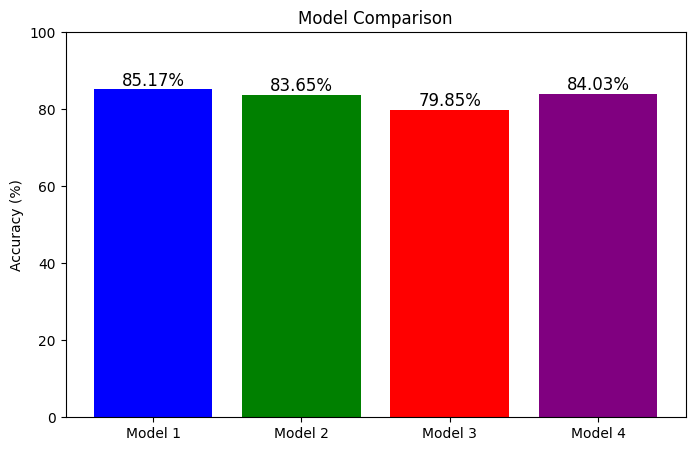